In [1]:

!pip install opencv-python
!pip install opencv-python-headless


   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.4 MB ? eta -:--:--
    --------------------------------------- 0.5/39.4 MB 1.5 MB/s eta 0:00:26
    --------------------------------------- 0.8/39.4 MB 1.3 MB/s eta 0:00:29
   - -------------------------------------- 1.0/39.4 MB 1.3 MB/s eta 0:00:29
   - -------------------------------------- 1.3/39.4 MB 1.3 MB/s eta 0:00:31
   - -------------------------------------- 1.6/39.4 MB 1.3 MB/s eta 0:00:31
   - -------------------------------------- 1.8/39.4 MB 1.3 MB/s eta 0:00:30
   -- ------------------------------------- 2.1/39.4 MB 1.2 MB/s eta 0:00:30
   -- ------------------------------------- 2.4/39.4 MB 1.2 MB/s eta 0:00:30
   -- ------------------------------------- 2.6/39.4 MB 1.2 MB/s eta 0:00:30
   -- ------------------------------------- 2.9/39.4 MB 1.2 MB/s eta 0:00:30
   --- ------------------------------------ 3.1/39.4 MB 1.2 MB/s eta 0:00:30
   --- ------

In [16]:
!pip install gdown


In [18]:
import gdown

# yolov4.cfg
gdown.download('https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg', 'yolov4.cfg', quiet=False)

# yolov4.weights
gdown.download('https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4.weights', 'yolov4.weights', quiet=False)

# coco.names
gdown.download('https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names', 'coco.names', quiet=False)


Downloading...
From: https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg
To: C:\Users\hameh\yolov4.cfg

Downloading...
From: https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4.weights
To: C:\Users\hameh\yolov4.weights

Downloading...
From: https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
To: C:\Users\hameh\coco.names

25B [00:00, ?B/s]                       

'coco.names'

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")


with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]


layer_names = net.getLayerNames()
unconnected_out_layers = net.getUnconnectedOutLayers()

if len(unconnected_out_layers.shape) == 2:
    output_layers = [layer_names[i[0] - 1] for i in unconnected_out_layers]
else:
    output_layers = [layer_names[i - 1] for i in unconnected_out_layers]



In [30]:

image_path = "OneDrive/Pictures/zoej.jpg" 


img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, channels = img.shape


blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), swapRB=True, crop=False)
net.setInput(blob)


outs = net.forward(output_layers)


class_ids = []
confidences = []
boxes = []

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


font = cv2.FONT_HERSHEY_SIMPLEX
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y - 10), font, 0.5, color, 2)


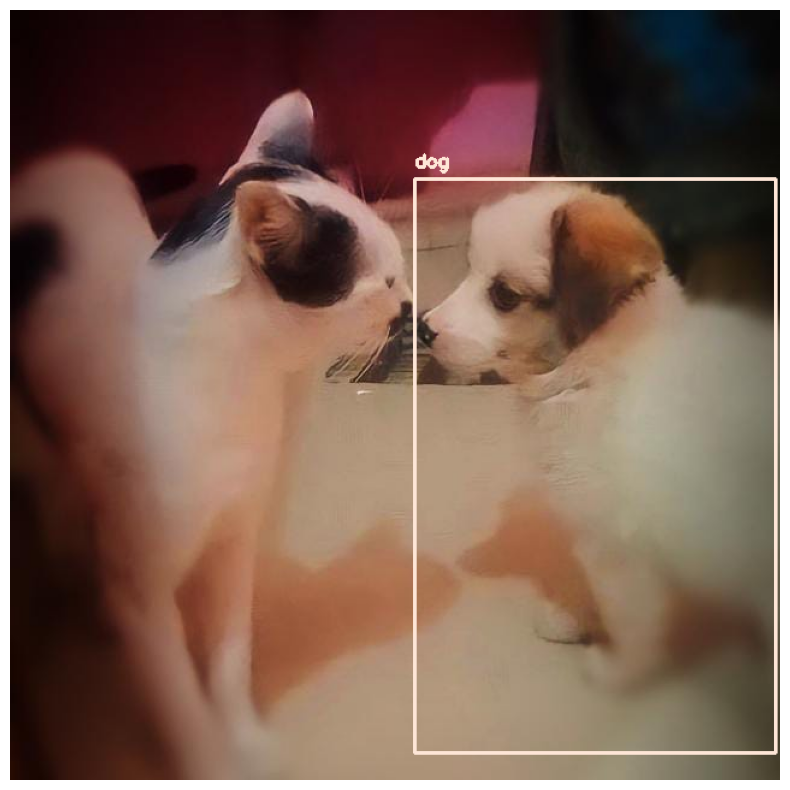

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()
